# 使用波士顿房价来比较随机森林中使用信息增益和基尼系数之间的差异
#### 信息增益（entropy）:表示该特征对总体结果的影响程度，信息增益越大，这个特征选择的就越好
#### 基尼系数（gini）:度量随机变量的不确定大小

In [1]:
from argparse import Namespace
from matplotlib import pyplot as plt
from urllib import request
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

In [2]:
args=Namespace(
    seed=1234,
    data_file='Boston.csv',
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,)
np.random.seed(args.seed)

In [3]:
# 导入波士顿房价数据集
boston_data=load_boston()
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [26]:
# 数据处理
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target']=boston_data.target.astype('str')
df=df.dropna()  #删除空值
print(df.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT target  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7

In [9]:
# 划分数据集
from sklearn.model_selection import train_test_split
X=df.drop(['target'],axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=args.train_size)
print('Train size: {0},Test size: {1}'.format(len(X_train),len(X_test)))

Train size: 379,Test size: 127


## 使用决策树初步判断哪些特征对房价的影响较小

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

In [11]:
# 初始化模型
dtree = DecisionTreeClassifier(criterion="entropy", random_state=args.seed)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [12]:
pred_train=dtree.predict(X_train)
pred_test=dtree.predict(X_test)

In [13]:
# 正确率
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_acc, test_acc))

train acc: 1.00, test acc: 0.01


In [14]:
# 可视化决策树
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(dtree,out_file=None,feature_names=boston_data.feature_names,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph

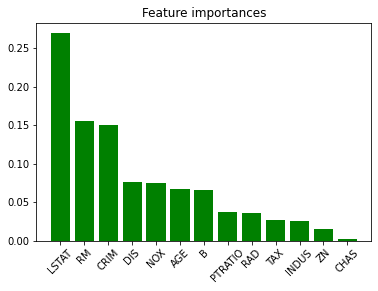

LSTAT - 0.269
RM - 0.155
CRIM - 0.151
DIS - 0.076
NOX - 0.075
AGE - 0.067
B - 0.065
PTRATIO - 0.037
RAD - 0.036
TAX - 0.027
INDUS - 0.025
ZN - 0.015
CHAS - 0.001


In [15]:
# 特征重要性
features = list(boston_data['feature_names'])
importances = dtree.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

# 画出树中的特征重要性
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="g", align="center")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='45')
plt.xlim([-1, num_features])
plt.show()

# 打印值
for i in indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))

In [27]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')


In [28]:
# # 去掉对房价影响不是很大的特征,低于0.03的特征
feature_nums=[ 'TAX', 'INDUS', 'ZN', 'CHAS']
df=df.drop(columns=feature_nums)
# 重新划分数据集
X=df.drop(['target'],axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=args.train_size)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
# 设置网格搜索参数
para_dict={'max_depth':[2,3,5,8,10,15,20],
           'min_samples_leaf':[1,2,3,4,5,6,9],
           'min_samples_split':[4,8],
           'n_estimators':[10,20,30,50,100,120]
          }

## 一、使用基尼系数

In [31]:
gini_tree=RandomForestClassifier(criterion='gini')
grid_search=GridSearchCV(estimator=gini_tree,param_grid=para_dict,cv=3)

In [32]:
grid_search.fit(X_train,y_train)

/home/tangxin/.conda/envs/covid/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 8, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 9],
                         'min_samples_split': [4, 8],
                         'n_estimators': [10, 20, 30, 50, 100, 120]})

In [33]:
pred_train=grid_search.predict(X_train)
pred_test=grid_search.predict(X_test)

In [34]:
# 评估

train_soc=accuracy_score(y_train,pred_train)
test_soc=accuracy_score(y_test,pred_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_soc, test_soc))

# 计算其他评价指标
precision, recall, F1, _ = precision_recall_fscore_support(y_test, pred_test, average="micro")
print ("precision: {0:.2f}. recall: {1:.2f}, F1: {2:.2f}".format(precision, recall, F1))

train acc: 0.64, test acc: 0.04
precision: 0.04. recall: 0.04, F1: 0.04


In [35]:
# 查看最佳参数组合
grid_search.best_params_

{'max_depth': 8,
 'min_samples_leaf': 9,
 'min_samples_split': 8,
 'n_estimators': 120}

In [36]:
# 使用最佳参数组合进行训练
best_estimator=grid_search.best_estimator_
best_estimator.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=9, min_samples_split=8,
                       n_estimators=120)

In [37]:
pred_best_train=best_estimator.predict(X_train)
pred_best_test=best_estimator.predict(X_test)

In [38]:
train_best_soc=accuracy_score(y_train,pred_best_train)
test_best_soc=accuracy_score(y_test,pred_best_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_best_soc, test_best_soc))

train acc: 0.63, test acc: 0.05


## 二、使用信息增益

In [39]:
entr_tree=RandomForestClassifier(criterion='entropy')
grid_search=GridSearchCV(estimator=entr_tree,param_grid=para_dict,cv=3)

In [40]:
grid_search.fit(X_train,y_train)

/home/tangxin/.conda/envs/covid/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [2, 3, 5, 8, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 9],
                         'min_samples_split': [4, 8],
                         'n_estimators': [10, 20, 30, 50, 100, 120]})

In [41]:
pred_train=grid_search.predict(X_train)
pred_test=grid_search.predict(X_test)

In [42]:
# 评估
train_soc=accuracy_score(y_train,pred_train)
test_soc=accuracy_score(y_test,pred_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_soc, test_soc))

# 计算其他评价指标
precision, recall, F1, _ = precision_recall_fscore_support(y_test, pred_test, average="micro")
print ("precision: {0:.2f}. recall: {1:.2f}, F1: {2:.2f}".format(precision, recall, F1))

train acc: 0.15, test acc: 0.02
precision: 0.02. recall: 0.02, F1: 0.02


In [43]:
# 查看最佳参数组合
grid_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'n_estimators': 10}

In [44]:
# 使用最佳参数组合进行训练
best_estimator=grid_search.best_estimator_
best_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6,
                       min_samples_split=8, n_estimators=10)

In [45]:
pred_best_train=best_estimator.predict(X_train)
pred_best_test=best_estimator.predict(X_test)

In [46]:
train_best_soc=accuracy_score(y_train,pred_best_train)
test_best_soc=accuracy_score(y_test,pred_best_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_best_soc, test_best_soc))

train acc: 0.16, test acc: 0.04
